In [1]:
from apad_env import APADEnv
from sb3_contrib import MaskablePPO
import matplotlib.pyplot as plt
import torch
import numpy as np
from scipy import stats
import pandas as pd

In [8]:
from torch.distributions import Distribution
Distribution.set_default_validate_args(False)

In [2]:
model = MaskablePPO.load("mppo_50k_2025-06-19_1400")

In [3]:
env = APADEnv()
obs, _ = env.reset()

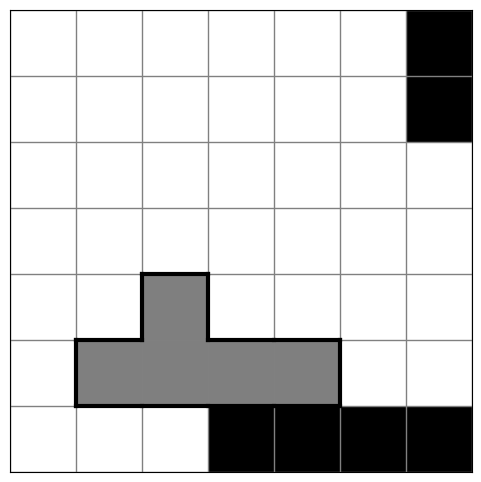

In [4]:
action, _ = model.predict(obs, deterministic=True)
env.step(action)
env.visualize()

In [6]:
def test_complete_game(model, env, verbose = False):
    obs, info = env.reset()
    total_reward = 0
    step_count = 0

    #action_masks = env.action_masks()
    
    while True:
        #if not np.any(action_masks):
        #    print(f"No valid actions at step {step_count}")
        #    break
            
        action, _ = model.predict(obs, action_masks=env.action_masks(), deterministic=False)
        
        #if not action_masks[action]:
        #    print(f"Invalid action {action}")
        #    valid_actions = np.where(action_masks)[0]
        #    action = np.random.choice(valid_actions)
        
        obs, reward, done, truncated, info = env.step(action)
        total_reward += reward
        step_count += 1

        if verbose:
            print(f"Step {step_count}: Action {action}, Reward {reward}, Total {total_reward}")
        
        if done or truncated:
            if verbose:
                print(f"Game ended: {'Win' if done else 'Loss'}")
            break

    if verbose:
        print(f"Final score: {total_reward}, Steps: {step_count}")
    return total_reward, step_count

### play until we win

1
Step 1: Action 244, Reward 1, Total 1
Step 2: Action 1594, Reward 1, Total 2
Step 3: Action 668, Reward 1, Total 3
Step 4: Action 2587, Reward 1, Total 4
Step 5: Action 2169, Reward 1, Total 5
Step 6: Action 1204, Reward 1, Total 6
Step 7: Action 716, Reward 1, Total 7
Step 8: Action 1866, Reward 3, Total 10
Game ended: Win
Final score: 10, Steps: 8


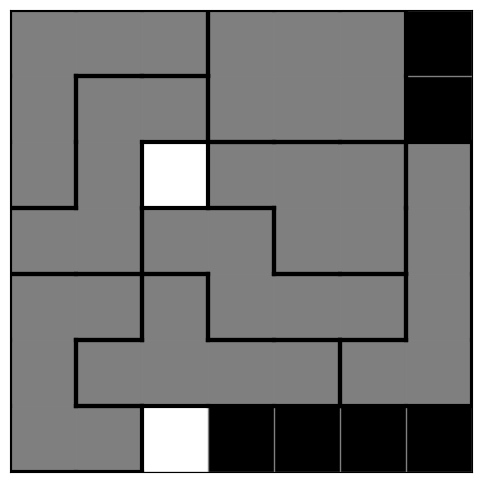

In [14]:
total_rewared = 0
step_count = 0
i = 0
while step_count < 8:
    i += 1
    print(i)
    total_reward, step_count = test_complete_game(model, env, True)
env.visualize()

### win rate

In [8]:
total_rewared = 0
step_count = 0
win = 0
for i in range(0,99):
    total_reward, step_count = test_complete_game(model, env)
    if step_count == 8:
        win += 1
    if i % 10 == 0:
        print(i)
print(f'success rate: {win/99.:.2f}')

0
10
20
30
40
50
60
70
80
90
success rate: 0.93


In [8]:
def evaluate_win_rate(model, env, n_episodes=100):
    wins = 0
    for i in range(n_episodes):
        if i % 10 == 0:
            print(i)
        obs, info = env.reset()
        done = False
        while not done:
            action, _ = model.predict(obs, deterministic=False,
                                      action_masks=info["action_mask"])
            obs, reward, terminated, truncated, info = env.step(action)
            done = terminated or truncated
        wins += terminated            # reward>0 and terminated ⇔ win in this env
    return wins / n_episodes

In [9]:
evaluate_win_rate(model, env)

0
10
20
30
40
50
60
70
80
90


0.96